# Lab-09 : Quantum Teleportation - Building using quantum circuits
### Note : Firstly I tried the practical experimentation which gives the wrong results, to uderstand it why this happened Next I provided the correct teleportation of the information
> Quantum information cannot be copied due to the *No Cloning Theorem*, however it can be "teleported" in the sense that a qubit can be entangled with a quantum resource, and via a protocol of measurements and *classical communication* of their results, the original quantum state can be reconstructed on a different qubit. This process destroys the information in the original qubit via measurement.

> What qauntum teleportation means ? It is the transfer of the one qubit state to another qubit state i.e transfer of the quantum information of one to another. In classical computer we copy and transfer it to someone but copying on quantum computer is not allowed due to it's property of no-cloning. When we try to copy qubits actually we are performing a quantum measurement on that qubit which destoryed it's state thus our qubit become destroyed.


To get around with these concepts we use the quantum entanglement of qubits and to build a quantum teleportation circuit.

In [15]:
from qiskit import *
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.primitives import Estimator, Sampler
from qiskit.visualization import plot_histogram

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background') # optional
from qiskit.circuit import ClassicalRegister, QuantumRegister

In [16]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

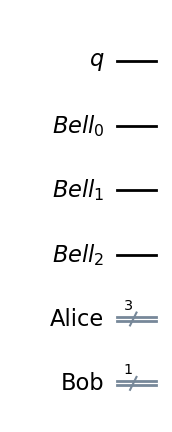

In [48]:

qc = QuantumCircuit(1)


bell = QuantumRegister(3, 'Bell')
alice = ClassicalRegister(3, 'Alice')
bob = ClassicalRegister(1, 'Bob')
qc.add_register(bell, alice, bob)
qc.draw(output='mpl')

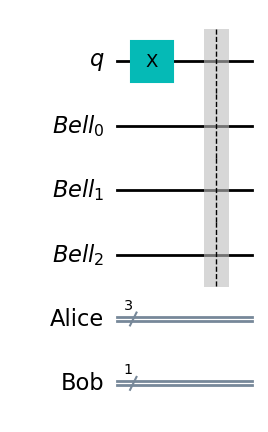

In [49]:
# we will teleport the state q_0 to q_2 with using q_1
qc.x(0)
qc.barrier()
qc.draw(output='mpl')

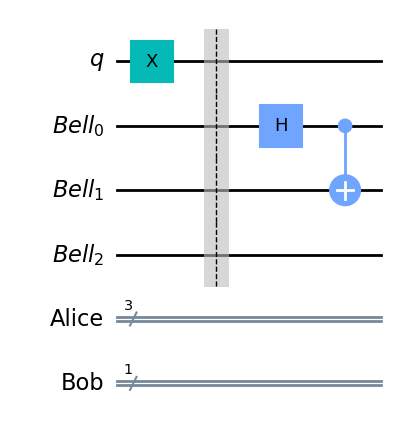

In [50]:
# barrier decide that after barrier q_0 has state |1> than of |0>
qc.h(1)
qc.cx(1, 2)
qc.draw(output='mpl')

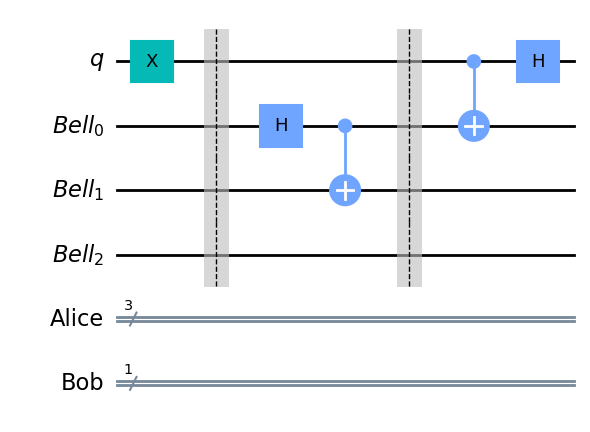

In [51]:
# It created an entangled state means same qubit exits on q_1 and q_2 at the same time  also
qc.barrier()
qc.cx(0, 1)
qc.h(0)

qc.draw(output='mpl')

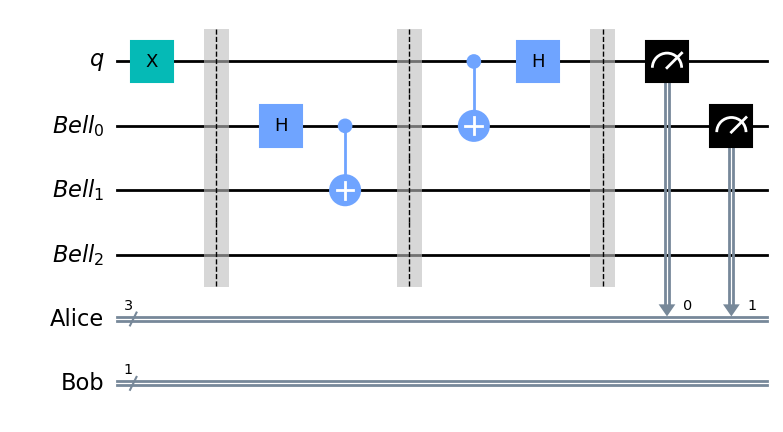

In [52]:
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

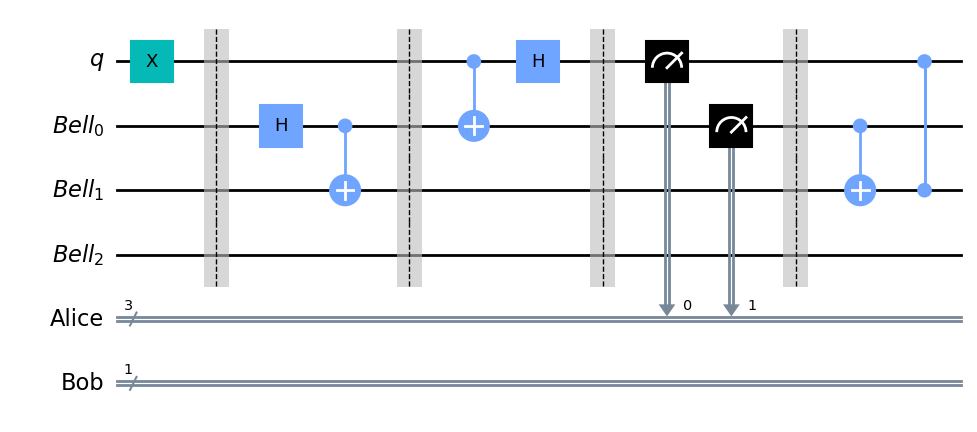

In [53]:
# before measure all the states are entangled but to complete the teleportation process 
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)

qc.draw(output='mpl')

In [54]:
print(counts)

{'100': 281, '110': 264, '111': 237, '101': 242}


In [56]:
from qiskit_aer.primitives import Sampler

angle = 5*np.pi/7

sampler = Sampler()
qc.measure_all()
job_static = sampler.run(qc)
job_dynamic = sampler.run(qc)

print(f"Original Dists: {job_static.result().quasi_dists[0].binary_probabilities()}")
print(f"Teleported Dists: {job_dynamic.result().quasi_dists[0].binary_probabilities()}")

Original Dists: {'010101010001': 0.2451171875, '011101110011': 0.23828125, '010001000000': 0.259765625, '011001100010': 0.2568359375}
Teleported Dists: {'011101110011': 0.263671875, '010001000000': 0.2587890625, '010101010001': 0.22265625, '011001100010': 0.2548828125}


In [57]:
from qiskit.result import marginal_counts

tele_counts = marginal_counts(
    job_dynamic.result().quasi_dists[0].binary_probabilities(),
    indices=[2],
) # marginalize counts

tele_counts

{'0': 1.0}

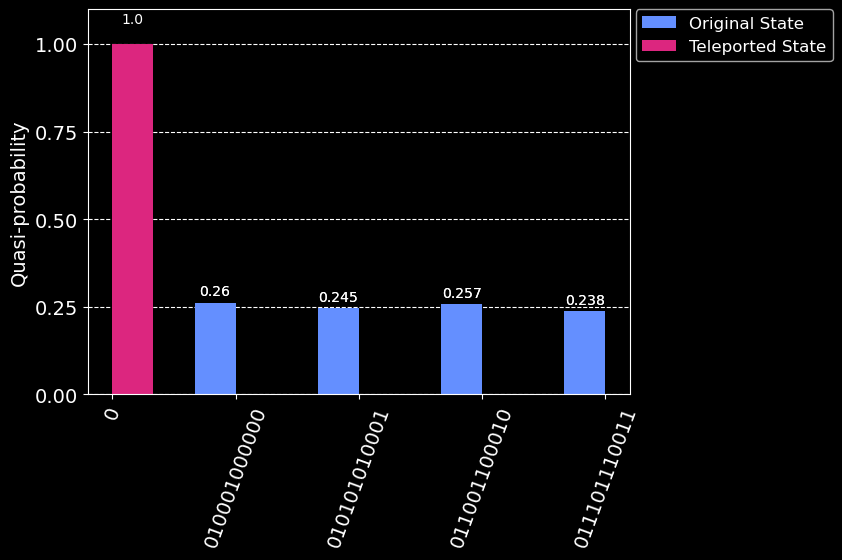

In [58]:
legend = ['Original State', 'Teleported State']
plot_histogram([job_static.result().quasi_dists[0].binary_probabilities(), tele_counts], legend=legend)

### Note : If some one able to correct the above teleportation correctly then share the code or just make a pull requests(open source contribution) on the github repositor of `mathelatics/Quantum-Machine-Learning_30`

## Bellow I just parametrized the quantum circuit and perform qubit teleportation similarly

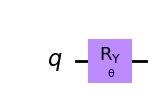

In [3]:
theta = Parameter('θ')

qr = QuantumRegister(1, 'q')
qc = QuantumCircuit(qr)
qc.ry(theta, 0)
qc.draw('mpl')

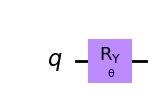

In [4]:
tele_qc = qc.copy()
tele_qc.draw(output='mpl')

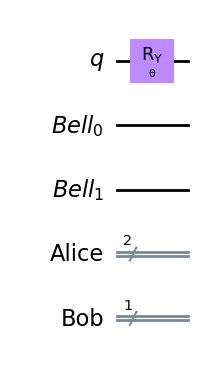

In [5]:
bell = QuantumRegister(2, 'Bell')
alice = ClassicalRegister(2, 'Alice')
bob = ClassicalRegister(1, 'Bob')
tele_qc.add_register(bell, alice, bob)
tele_qc.draw('mpl')

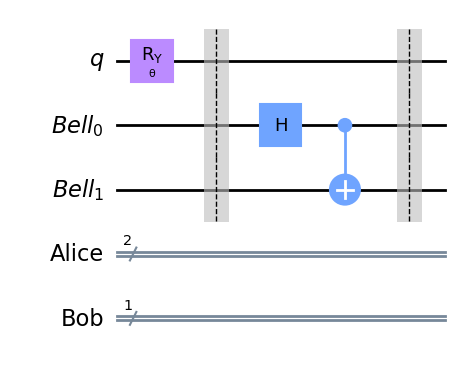

In [6]:
# create Bell state with other two qubits
tele_qc.barrier()
tele_qc.h(1)
tele_qc.cx(1, 2)
tele_qc.barrier()
tele_qc.draw('mpl')

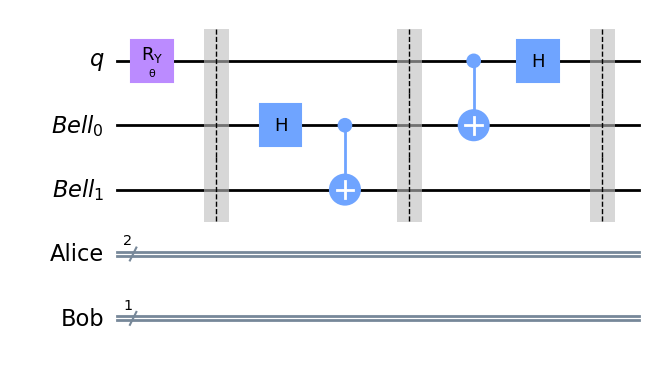

In [7]:
# alice operates on her qubits
tele_qc.cx(0, 1)
tele_qc.h(0)
tele_qc.barrier()
tele_qc.draw('mpl')

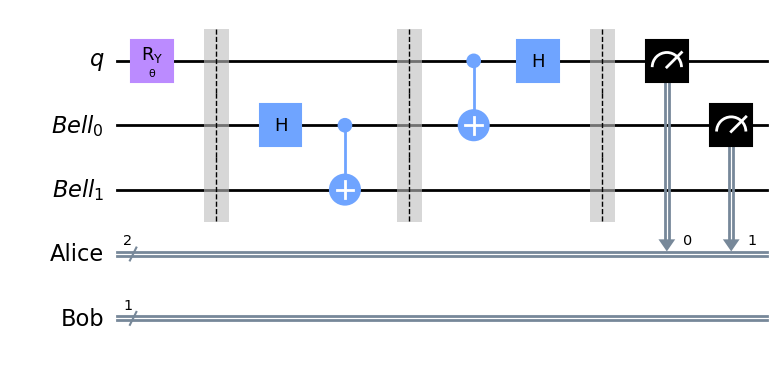

In [8]:
tele_qc.measure([qr[0], bell[0]], alice)
tele_qc.draw('mpl')

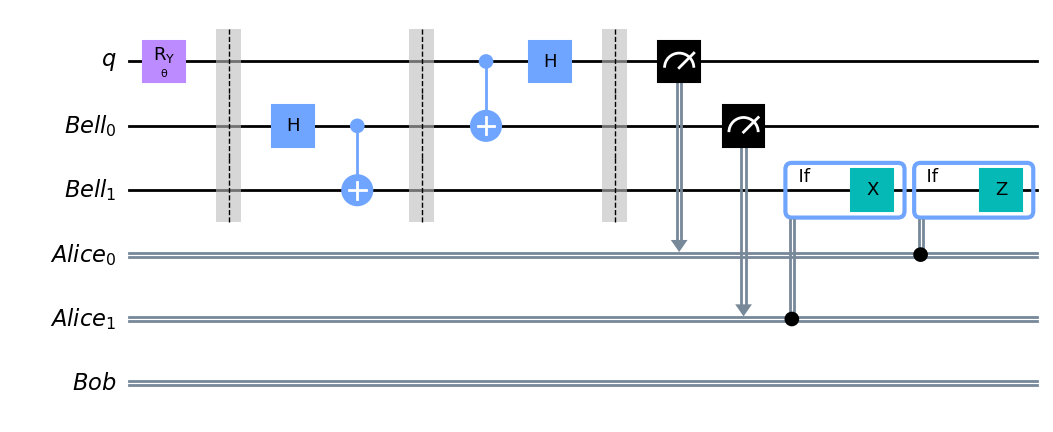

In [9]:
new_qc = tele_qc.copy()

##############################
# add gates to new_qc here
with new_qc.if_test((alice[1], 1)) as _:
    new_qc.x(2)
with new_qc.if_test((alice[0], 1)) as _:
    new_qc.z(2)

##############################

new_qc.draw('mpl')

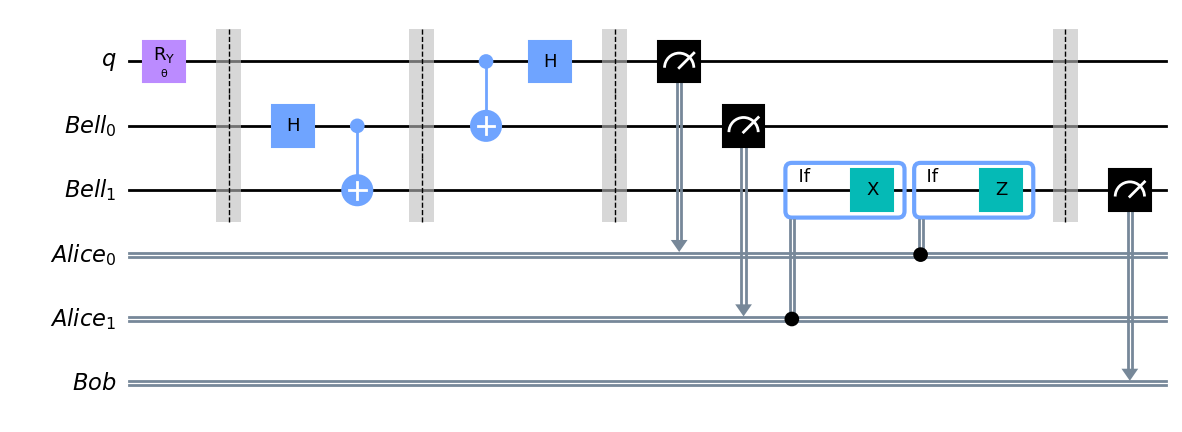

In [10]:
new_qc.barrier()
new_qc.measure(bell[1], bob)
new_qc.draw('mpl')

In [12]:
from qiskit_aer.primitives import Sampler

angle = 5*np.pi/7

sampler = Sampler()
qc.measure_all()
job_static = sampler.run(qc.bind_parameters({theta: angle}))
job_dynamic = sampler.run(new_qc.bind_parameters({theta: angle}))

print(f"Original Dists: {job_static.result().quasi_dists[0].binary_probabilities()}")
print(f"Teleported Dists: {job_dynamic.result().quasi_dists[0].binary_probabilities()}")

Original Dists: {'11': 0.8212890625, '00': 0.1787109375}
Teleported Dists: {'111': 0.2099609375, '100': 0.1669921875, '101': 0.23046875, '110': 0.1962890625, '001': 0.037109375, '000': 0.0595703125, '010': 0.0458984375, '011': 0.0537109375}


In [13]:
from qiskit.result import marginal_counts

tele_counts = marginal_counts(
    job_dynamic.result().quasi_dists[0].binary_probabilities(),
    indices=[2],
) # marginalize counts

tele_counts

{'1': 0.8037109375, '0': 0.1962890625}

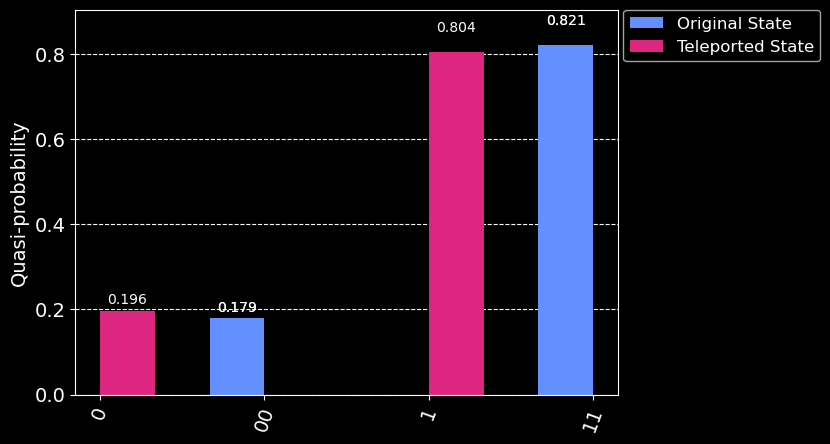

In [14]:
legend = ['Original State', 'Teleported State']
plot_histogram([job_static.result().quasi_dists[0].binary_probabilities(), tele_counts], legend=legend)

## Conclusion 
finally I just teleported the Alice Qubit to bob i.e Alice Message reaches bob correctly read it.